<a href="https://colab.research.google.com/github/sumaiya08/medicaldata/blob/master/Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Access data using Google BigQuery.
from google.colab import auth
from google.cloud import bigquery

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
auth.authenticate_user()
print('Authenticated')

Authenticated


In [0]:
project_id='eicudata'

Frequency of hospital admission amongst patients

In [0]:
%%bigquery --project $project_id freq
select uniquepid, count(patienthealthsystemstayid) as numvisit
from `physionet-data.eicu_crd.patient` 
group by uniquepid
order by uniquepid

In [0]:
freq
print('Total number of patients -', len(freq))

Total number of patients - 139367


Visualising the frequency of admission of patients to the hospital:

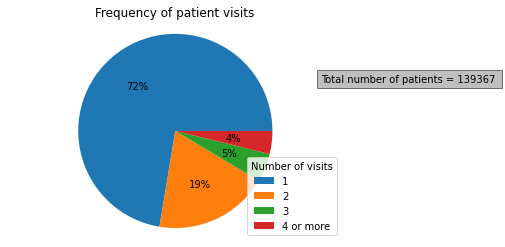

In [5]:
a=freq.numvisit[freq.numvisit==1].count()
b=freq.numvisit[freq.numvisit==2].count()
c=freq.numvisit[freq.numvisit==3].count()
d=freq.numvisit[freq.numvisit>=4].count()
visits = [a,b,c,d]


labels = '1','2','3','4 or more'
plt.pie(visits,autopct='%1.0f%%')
plt.title('Frequency of patient visits')
plt.legend(labels,title='Number of visits', loc ="lower right")
plt.text(1.5,0.5,'Total number of patients = 139367 ',bbox=dict(facecolor='grey',alpha=0.5))
plt.axis('equal')
plt.show()

Visualising some of the demographic factors (age,gender) of the patient table in eicu dataset :

In [0]:
%%bigquery --project $project_id patient
select * from `physionet-data.eicu_crd.patient`;



1. Extracting alive and expired patients from the data.
2. Categorizing alive and expired patients data based on the age groups like (15-19),(20-24), etc.

In [9]:
ages=["15-19","20-24","25-29","30-34","35-39","40-44","45-49","50-54","55-59","60-64","65-69","70-74","75-79","80-84","85+"]
alive = patient[(patient.unitdischargestatus=='Alive')]
#alive.dtypes
#alive['age'] = pd.to_numeric(alive['age'])
#alive.astype({"age":int})df["a"] = pd.to_numeric(df["a"])
a1 = alive.age[(alive.age>='15') & (alive.age<'20')].count()
a2 = alive.age[(alive.age>='20') & (alive.age<'25')].count()
a3 = alive.age[(alive.age>='25') & (alive.age<'30')].count()
a4 = alive.age[(alive.age>='30') & (alive.age<'35')].count()
a5 = alive.age[(alive.age>='35') & (alive.age<'40')].count()
a6 = alive.age[(alive.age>='40') & (alive.age<'45')].count()
a7 = alive.age[(alive.age>='45') & (alive.age<'50')].count()
a8 = alive.age[(alive.age>='50') & (alive.age<'55')].count()
a9 = alive.age[(alive.age>='55') & (alive.age<'60')].count()
a10 = alive.age[(alive.age>='60') & (alive.age<'65')].count()
a11 = alive.age[(alive.age>='65') & (alive.age<'70')].count()
a12 = alive.age[(alive.age>='70') & (alive.age<'75')].count()
a13 = alive.age[(alive.age>='75') & (alive.age<'80')].count()
a14 = alive.age[(alive.age>='80') & (alive.age<'85')].count()
a15 = alive.age[(alive.age>='85') & (alive.age=='> 89')].count()
print('Alive patients count for each age group:',a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15)
values = [a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15]

#a=freq.numvisit[freq.numvisit==1].count()
#alive = alive.set_index("unitdischargestatus")
#alive = alive.drop("Expired", axis=0)
expired = patient[patient.unitdischargestatus=='Expired']
e1 = expired.age[(expired.age>='15') & (expired.age<'20')].count()
e2 = expired.age[(expired.age>='20') & (expired.age<'25')].count()
e3 = expired.age[(expired.age>='25') & (expired.age<'30')].count()
e4 = expired.age[(expired.age>='30') & (expired.age<'35')].count()
e5 = expired.age[(expired.age>='35') & (expired.age<'40')].count()
e6 = expired.age[(expired.age>='40') & (expired.age<'45')].count()
e7 = expired.age[(expired.age>='45') & (expired.age<'50')].count()
e8 = expired.age[(expired.age>='50') & (expired.age<'55')].count()
e9 = expired.age[(expired.age>='55') & (expired.age<'60')].count()
e10 = expired.age[(expired.age>='60') & (expired.age<'65')].count()
e11 = expired.age[(expired.age>='65') & (expired.age<'70')].count()
e12 = expired.age[(expired.age>='70') & (expired.age<'75')].count()
e13 = expired.age[(expired.age>='75') & (expired.age<'80')].count()
e14 = expired.age[(expired.age>='80') & (expired.age<'85')].count()
e15 = expired.age[(expired.age>='85') & (expired.age=='> 89')].count()
print('Expired patients count for each age group:', e1,e2,e3,e4,e5,e6,e7,e8,e9,e10,e11,e12,e13,e14,e15)
values1 = [e1,e2,e3,e4,e5,e6,e7,e8,e9,e10,e11,e12,e13,e14,e15]

#print(alive)
#zero = alive.groupby('uniquepid')
#len(zero.count())
#zero1 = expired.groupby('uniquepid')
#len(zero1.count())
#zero = alive.unitdischargestatus.count()

#zero1=expired.unitdischargestatus.count()
#values = [zero,zero1]

Alive patients count for each age group: 1628 3933 4553 5164 5832 7270 10460 15532 18709 20398 22222 21242 19058 15833 6437
Expired patients count for each age group: 35 92 108 148 191 217 394 677 878 1145 1307 1350 1406 1319 644


Visual representation of admission frequencies of patients based on different age groups - 

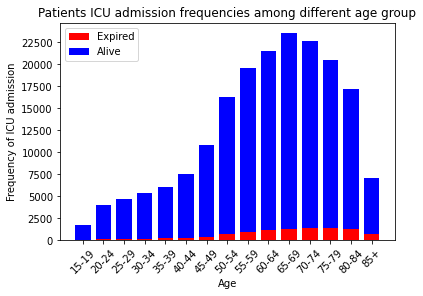

In [10]:
N=15
ind = np.arange(N)
#index = np.arange(len(ages))
#score_label = np.arange(0,12500,2500)
width = 0.75
p1 = plt.bar(ages,values1,width,color="red",label="Expired")
p2 = plt.bar(ages,values,width,color="blue",label="Alive",bottom=values1)
plt.xlabel('Age')
plt.ylabel('Frequency of ICU admission')
plt.title('Patients ICU admission frequencies among different age group')
plt.xticks(ind, ages,rotation =45)
#plt.set_xticklabels(ages, rotation = 45, ha="right")
plt.yticks(np.arange(0, 25000, 2500))
plt.legend((p1[0], p2[0]), ('Expired', 'Alive'))
plt.show()

Visualising expired patients based on gender
1. Extracting expired patients data from 'expired' dataframe based on gender.
2. Categorizing expired male and female data based on age groups.
3. Calculating mortality rate for this categorized data


In [13]:
expired
female = expired[(expired.gender=='Female')]
#print(len(female))
male = expired[(expired.gender=='Male')]
f1 = female.age[(female.age>='15')&(female.age<'20')].count()
f2 = female.age[(female.age>='20')&(female.age<'25')].count()
f3 = female.age[(female.age>='25')&(female.age<'30')].count()
f4 = female.age[(female.age>='30')&(female.age<'35')].count()
f5 = female.age[(female.age>='35')&(female.age<'40')].count()
f6 = female.age[(female.age>='40')&(female.age<'45')].count()
f7 = female.age[(female.age>='45')&(female.age<'50')].count()
f8 = female.age[(female.age>='50')&(female.age<'55')].count()
f9 = female.age[(female.age>='55')&(female.age<'60')].count()
f10 = female.age[(female.age>='60')&(female.age<'65')].count()
f11 = female.age[(female.age>='65')&(female.age<'70')].count()
f12 = female.age[(female.age>='70')&(female.age<'75')].count()
f13 = female.age[(female.age>='75')&(female.age<'80')].count()
f14 = female.age[(female.age>='80')&(female.age<'85')].count()
f15 = female.age[(female.age>='85')&(female.age=='> 89')].count()

print('Expired female patients count for each age group:',f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15)
#mor_fem = [f1/len(expired)*100,f2/len(expired)*100,f3/len(expired)*100,f4/len(expired)*100,f5/len(expired)*100,f6/len(expired)*100,f7/len(expired)*100,f8/len(expired)*100,f9/len(expired)*100,f10/len(expired)*100,f11/len(expired)*100,f12/len(expired)*100,f13/len(expired)*100,f14/len(expired)*100,f15/len(expired)*100]

mor_fem = [f1/len(female)*100,f2/len(female)*100,f3/len(female)*100,f4/len(female)*100,f5/len(female)*100,f6/len(female)*100,f7/len(female)*100,f8/len(female)*100,f9/len(female)*100,f10/len(female)*100,f11/len(female)*100,f12/len(female)*100,f13/len(female)*100,f14/len(female)*100,f15/len(female)*100]
print('Mortality rate for each age group in females:', mor_fem)

m1 = male.age[(male.age>='15')&(male.age<'20')].count()
m2 = male.age[(male.age>='20')&(male.age<'25')].count()
m3 = male.age[(male.age>='25')&(male.age<'30')].count()
m4 = male.age[(male.age>='30')&(male.age<'35')].count()
m5 = male.age[(male.age>='35')&(male.age<'40')].count()
m6 = male.age[(male.age>='40')&(male.age<'45')].count()
m7 = male.age[(male.age>='45')&(male.age<'50')].count()
m8 = male.age[(male.age>='50')&(male.age<'55')].count()
m9 = male.age[(male.age>='55')&(male.age<'60')].count()
m10 = male.age[(male.age>='60')&(male.age<'65')].count()
m11 = male.age[(male.age>='65')&(male.age<'70')].count()
m12 = male.age[(male.age>='70')&(male.age<'75')].count()
m13 = male.age[(male.age>='75')&(male.age<'80')].count()
m14 = male.age[(male.age>='80')&(male.age<'85')].count()
m15 = male.age[(male.age>='85')&(male.age=='> 89')].count()

print('Expired male patients count for each age group:',m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,m15)
mor_male = [m1/len(male)*100,m2/len(male)*100,m3/len(male)*100,m4/len(male)*100,m5/len(male)*100,m6/len(male)*100,m7/len(male)*100,m8/len(male)*100,m9/len(male)*100,m10/len(male)*100,m11/len(male)*100,m12/len(male)*100,m13/len(male)*100,m14/len(male)*100,m15/len(male)*100]
print('Mortality rate for each age group in males:', mor_male)


Expired female patients count for each age group: 12 30 45 56 76 99 156 297 383 472 626 573 640 633 366
Mortality rate for each age group in females: [0.2416918429003021, 0.6042296072507553, 0.906344410876133, 1.1278952668680766, 1.5307150050352467, 1.9939577039274923, 3.141993957703928, 5.981873111782477, 7.713997985901309, 9.506545820745217, 12.608257804632428, 11.540785498489425, 12.890231621349447, 12.749244712990937, 7.371601208459215]
Expired male patients count for each age group: 23 62 63 92 115 118 238 380 495 673 681 777 765 685 266
Mortality rate for each age group in males: [0.3883167313861219, 1.0467668411278068, 1.0636501772750295, 1.5532669255444875, 1.9415836569306095, 1.9922336653722776, 4.018234003039001, 6.4156677359446235, 8.357251392875233, 11.362485227080871, 11.497551916258653, 13.118352186392032, 12.915752152625359, 11.565085260847544, 4.4909674151612355]


Visualising patients ICU mortality rate per age group and gender -

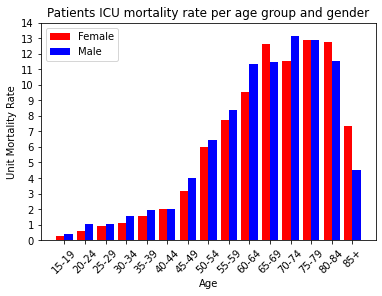

In [14]:
N=15
ind = np.arange(N)
#index = np.arange(len(ages))
#score_label = np.arange(0,12500,2500)
width = 0.4
p1 = plt.bar(ind,mor_fem,width,color="red",label="Female")
p2 = plt.bar(ind+width,mor_male,width,color="blue",label="Male")
plt.xlabel('Age')
plt.ylabel('Unit Mortality Rate')
plt.title('Patients ICU mortality rate per age group and gender')
plt.xticks(ind + width/2, ages,rotation =45)
#plt.set_xticklabels(ages, rotation = 45, ha="right")
plt.yticks(np.arange(0.0, 14.5))
plt.legend((p1[0], p2[0]), ('Female', 'Male'))
plt.show()

Visualising age distribution of expired patients based on gender - 

1. To use a boxplot for comparing columns like 'age' : we need to convert the column type to numeric from string.

In [15]:
#expired.boxplot(column='age',by='gender')
expired['age'].replace({'> 89': '90'}, inplace=True)
expired['age'] = pd.to_numeric(expired['age'])
#print(expired)
#expired.dtypes
#expired.drop(expired.age=='> 89')
#expired['age'] = pd.to_numeric(expired['age'])

#expired.boxplot(column='age',by='gender',patch_artist = True, grid = False)
#bp.ylabel('Age')

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Age distribution of patients who died in ICU based on gender 


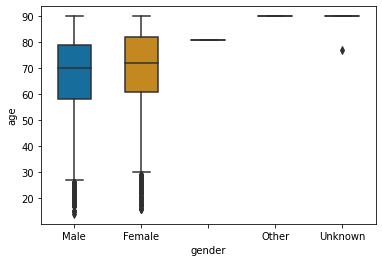

In [16]:
bplot = sns.boxplot(y='age', x='gender', 
                 data=expired, 
                 width=0.5,
                 palette="colorblind",)

Ethnicity distribution of patients - 

In [0]:
%%bigquery --project $project_id race
select uniquepid, ethnicity
from `physionet-data.eicu_crd.patient` 
group by uniquepid,ethnicity
order by uniquepid;

In [19]:
race

,uniquepid,ethnicity
0,002-10009,Caucasian
1,002-10018,Caucasian
2,002-10034,Caucasian
3,002-10050,Caucasian
4,002-10052,Caucasian
...,...,...
140095,035-9957,Caucasian
140096,035-9959,Caucasian
140097,035-996,African American
140098,035-9966,African American


Visualising the ethnicity distribution of patients using a pie chart - 
1. Finding number of each patients for each ethnicity

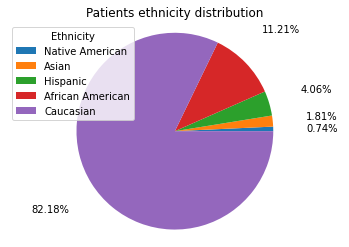

In [20]:
a=race.ethnicity[race.ethnicity=='Native American'].count()
b=race.ethnicity[race.ethnicity=='Asian'].count()
c=race.ethnicity[race.ethnicity=='Hispanic'].count()
d=race.ethnicity[race.ethnicity=='African American'].count()
e=race.ethnicity[race.ethnicity=='Caucasian'].count()
#f=race.ethnicity[race.ethnicity=='Other/Unknown'].count()
#g=race.ethnicity[race.ethnicity==''].count()
#print(f)
#print(g)
#f=f+g
#print(f)
races = [a,b,c,d,e]


labels = 'Native American','Asian','Hispanic','African American','Caucasian'
plt.pie(races,autopct='%1.2f%%',pctdistance=1.5,labeldistance = 2)
plt.title('Patients ethnicity distribution')
plt.legend(labels,title='Ethnicity', loc ="best")
plt.axis('equal')
plt.show()

Visualising ICU mortality rate per age group and ethnicity -
1. Extracting expired patients data based on ethnicity
2. Categorising this extracted data as per age groups
3. Calculating mortality rate for the categorised data

In [22]:
expired
aa = expired[(expired.ethnicity=='African American')]
print('Total deaths in African American patients:',len(aa))
ca = expired[(expired.ethnicity=='Caucasian')]
print('Total deaths in Caucasian patients:',len(ca))
a1 = aa.age[(aa.age>=15)&(aa.age<20)].count()
a2 = aa.age[(aa.age>=20)&(aa.age<25)].count()
a3 = aa.age[(aa.age>=25)&(aa.age<30)].count()
a4 = aa.age[(aa.age>=30)&(aa.age<35)].count()
a5 = aa.age[(aa.age>=35)&(aa.age<40)].count()
a6 = aa.age[(aa.age>=40)&(aa.age<45)].count()
a7 = aa.age[(aa.age>=45)&(aa.age<50)].count()
a8 = aa.age[(aa.age>=50)&(aa.age<55)].count()
a9 = aa.age[(aa.age>=55)&(aa.age<60)].count()
a10 = aa.age[(aa.age>=60)&(aa.age<65)].count()
a11 = aa.age[(aa.age>=65)&(aa.age<70)].count()
a12 = aa.age[(aa.age>=70)&(aa.age<75)].count()
a13 = aa.age[(aa.age>=75)&(aa.age<80)].count()
a14 = aa.age[(aa.age>=80)&(aa.age<85)].count()
a15 = aa.age[(aa.age>=85)].count()
print('Count of deaths in African Americans for each age group:',a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15)
aadeath=[a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15]
values = [a1/len(aa)*100,a2/len(aa)*100,a3/len(aa)*100,a4/len(aa)*100,a5/len(aa)*100,a6/len(aa)*100,a7/len(aa)*100,a8/len(aa)*100,a9/len(aa)*100,a10/len(aa)*100,a11/len(aa)*100,a12/len(aa)*100,a13/len(aa)*100,a14/len(aa)*100,a15/len(aa)*100]
print('Mortality rate for African American patients for each age group:',values)
ca1 = ca.age[(ca.age>=15)&(ca.age<20)].count()
ca2 = ca.age[(ca.age>=20)&(ca.age<25)].count()
ca3 = ca.age[(ca.age>=25)&(ca.age<30)].count()
ca4 = ca.age[(ca.age>=30)&(ca.age<35)].count()
ca5 = ca.age[(ca.age>=35)&(ca.age<40)].count()
ca6 = ca.age[(ca.age>=40)&(ca.age<45)].count()
ca7 = ca.age[(ca.age>=45)&(ca.age<50)].count()
ca8 = ca.age[(ca.age>=50)&(ca.age<55)].count()
ca9 = ca.age[(ca.age>=55)&(ca.age<60)].count()
ca10 = ca.age[(ca.age>=60)&(ca.age<65)].count()
ca11 = ca.age[(ca.age>=65)&(ca.age<70)].count()
ca12 = ca.age[(ca.age>=70)&(ca.age<75)].count()
ca13 = ca.age[(ca.age>=75)&(ca.age<80)].count()
ca14 = ca.age[(ca.age>=80)&(ca.age<85)].count()
ca15 = ca.age[(ca.age>=85)].count()
print('Count of deaths in Caucasians for each age group:',ca1,ca2,ca3,ca4,ca5,ca6,ca7,ca8,ca9,ca10,ca11,ca12,ca13,ca14,ca15)
cadeath=[ca1,ca2,ca3,ca4,ca5,ca6,ca7,ca8,ca9,ca10,ca11,ca12,ca13,ca14,ca15]
values1= [ca1/len(ca)*100,ca2/len(ca)*100,ca3/len(ca)*100,ca4/len(ca)*100,ca5/len(ca)*100,ca6/len(ca)*100,ca7/len(ca)*100,ca8/len(ca)*100,ca9/len(ca)*100,ca10/len(ca)*100,ca11/len(ca)*100,ca12/len(ca)*100,ca13/len(ca)*100,ca14/len(ca)*100,ca15/len(ca)*100]
#values1= [ca1/len(ca)*100,ca2/len(ca),ca3/len(ca),ca4/len(ca),ca5/len(ca),ca6/len(ca),ca7/len(ca),ca8/len(ca),ca9/len(ca),ca10/len(ca),ca11/len(ca),ca12/len(ca),ca13/len(ca),ca14/len(ca),ca15/len(ca)]
print('Mortality rate for Caucasian patients for each age group:',values1)

Total deaths in African American patients: 1155
Total deaths in Caucasian patients: 8450
Count of deaths in African Americans for each age group: 5 17 14 36 33 49 63 99 118 143 151 124 114 89 100
Mortality rate for African American patients for each age group: [0.4329004329004329, 1.471861471861472, 1.2121212121212122, 3.116883116883117, 2.857142857142857, 4.242424242424243, 5.454545454545454, 8.571428571428571, 10.216450216450216, 12.380952380952381, 13.073593073593074, 10.735930735930737, 9.87012987012987, 7.705627705627706, 8.658008658008658]
Count of deaths in Caucasians for each age group: 23 58 72 88 124 128 265 480 648 875 1018 1094 1145 1087 1344
Mortality rate for Caucasian patients for each age group: [0.27218934911242604, 0.6863905325443788, 0.8520710059171597, 1.0414201183431953, 1.467455621301775, 1.514792899408284, 3.1360946745562135, 5.680473372781065, 7.668639053254438, 10.355029585798817, 12.04733727810651, 12.946745562130177, 13.550295857988164, 12.863905325443787, 15

Visualisation of mortality rate per age group and ethnicity-

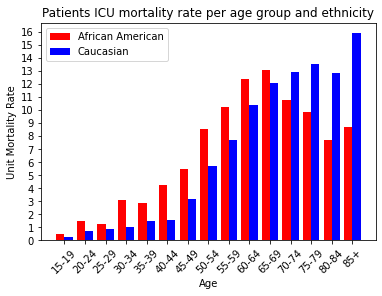

In [0]:
N=15
ind = np.arange(N)
#index = np.arange(len(ages))
#score_label = np.arange(0,12500,2500)
width = 0.4
p1 = plt.bar(ind,values,width,color="red",label="African American")
p2 = plt.bar(ind+width,values1,width,color="blue",label="Caucasian")
plt.xlabel('Age')
plt.ylabel('Unit Mortality Rate')
plt.title('Patients ICU mortality rate per age group and ethnicity')
plt.xticks(ind + width/2, ages,rotation =45)
#plt.set_xticklabels(ages, rotation = 45, ha="right")
plt.yticks(np.arange(0,17))
plt.legend((p1[0], p2[0]), ('African American', 'Caucasian'))
plt.show()

Visualisation depicting age distribution of patients who died in ICU based on different ethnic groups -

[Text(0, 0, 'Caucasian'),
 Text(0, 0, 'African American'),
 Text(0, 0, 'Hispanic'),
 Text(0, 0, ''),
 Text(0, 0, 'Other/Unknown'),
 Text(0, 0, 'Asian'),
 Text(0, 0, 'Native American')]

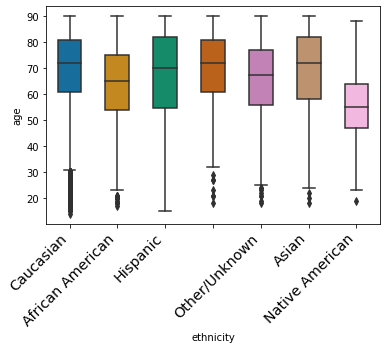

In [0]:
bplot = sns.boxplot(y='age', x='ethnicity', 
                 data=expired, 
                 width=0.5,
                 palette="colorblind")
bplot.set_xticklabels(bplot.get_xticklabels(),rotation=45,horizontalalignment='right',fontsize='x-large',fontweight='light')
#bplot.xticks(rotation=45)

Dataframe that includes total deaths and mortality rate for each age group based on ethnicity -

In [23]:
table1={'Age column':ages,'Caucasian Death #':cadeath,'Caucasian Mortality Rate':values1,'African American Death#':aadeath,'African American Mortality Rate':values}
table1_df=pd.DataFrame(table1)
table1_df

,Age column,Caucasian Death #,Caucasian Mortality Rate,African American Death#,African American Mortality Rate
0,15-19,23,0.272189,5,0.432900
1,20-24,58,0.686391,17,1.471861
2,25-29,72,0.852071,14,1.212121
3,30-34,88,1.041420,36,3.116883
4,35-39,124,1.467456,33,2.857143
5,40-44,128,1.514793,49,4.242424
6,45-49,265,3.136095,63,5.454545
7,50-54,480,5.680473,99,8.571429
8,55-59,648,7.668639,118,10.216450
9,60-64,875,10.355030,143,12.380952


Query to find most frequent diseases with highest mortality rates based on ICU discharge status - (TOP 20) 
*Note - There are 2 types of discharge status in the dataset - ICU and hospital 

In [0]:
%%bigquery --project $project_id topdiseases_death
select apacheadmissiondx, count(apacheadmissiondx) as count,count(apacheadmissiondx)*100/(select count(*) from `physionet-data.eicu_crd.patient` where unitdischargestatus='Expired') as morpct
from `physionet-data.eicu_crd.patient` 
where unitdischargestatus='Expired'
group by apacheadmissiondx 
order by count(apacheadmissiondx) desc
limit 20;

In [26]:
topdiseases_death.columns=['Disease','Patients(#)','Mortality(%)']
topdiseases_death


,Disease,Patients(#),Mortality(%)
0,Cardiac arrest (with or without respiratory ar...,1900,17.420006
1,"Sepsis, pulmonary",1068,9.791877
2,,692,6.344549
3,"Sepsis, GI",391,3.584854
4,"CHF, congestive heart failure",357,3.273127
5,"Pneumonia, bacterial",332,3.043917
6,"Sepsis, renal/UTI (including bladder)",331,3.034748
7,"CVA, cerebrovascular accident/stroke",331,3.034748
8,"Arrest, respiratory (without cardiac arrest)",330,3.025580
9,"Sepsis, unknown",318,2.915559


Query to find most frequent diseases with highest mortality rates based on hospital discharge status - (TOP 20) 

In [0]:
%%bigquery --project $project_id topdiseases_hospdeath
select apacheadmissiondx, count(apacheadmissiondx) as count,count(apacheadmissiondx)*100/(select count(*) from `physionet-data.eicu_crd.patient` where hospitaldischargestatus='Expired') as morpct
from `physionet-data.eicu_crd.patient` 
where hospitaldischargestatus='Expired'
group by apacheadmissiondx 
order by count(apacheadmissiondx) desc
limit 20;

In [28]:
topdiseases_hospdeath.columns=['Disease','Patients(#)','Mortality(%)']
topdiseases_hospdeath

,Disease,Patients(#),Mortality(%)
0,Cardiac arrest (with or without respiratory ar...,2345,13.024883
1,"Sepsis, pulmonary",1641,9.114641
2,,1481,8.225950
3,"CHF, congestive heart failure",683,3.793601
4,"CVA, cerebrovascular accident/stroke",662,3.676961
5,"Sepsis, renal/UTI (including bladder)",591,3.282604
6,"Pneumonia, bacterial",585,3.249278
7,"Sepsis, GI",579,3.215952
8,"Arrest, respiratory (without cardiac arrest)",566,3.143746
9,"Sepsis, unknown",480,2.666074
